CODE BLOCK: 1

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import os
import sys
sys.path.insert(0,'/content/drive/MyDrive/ERAV2/Assignment5')

In [3]:
os.path.abspath('/content/drive/MyDrive/ERAV2/Assignment5')

'/content/drive/MyDrive/ERAV2/Assignment5'

In [4]:
%cd /content/drive/MyDrive/ERAV2/Assignment5
%pwd

/content/drive/MyDrive/ERAV2/Assignment5


'/content/drive/MyDrive/ERAV2/Assignment5'

In [5]:
from model import Net, train, test
from utils import plot_data, GetCorrectPredCount, plot_performance

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

CODE BLOCK: 2

In [7]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


CODE BLOCK: 3

In [8]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [9]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [10]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

In [11]:
len(train_data), len(iter(train_loader))

(60000, 118)

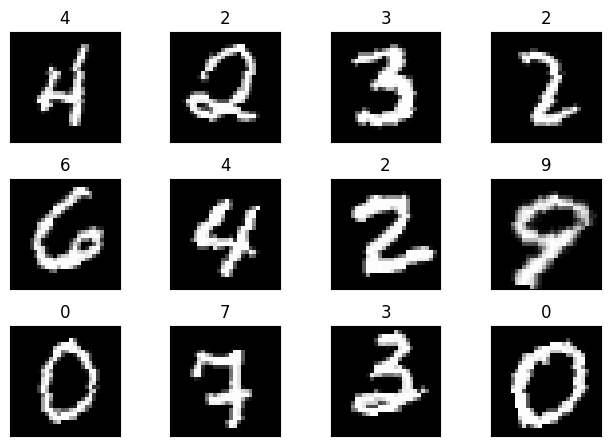

In [12]:
plot_data(train_loader)

CODE BLOCK: 6

In [13]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


*CODE* BLOCK: 7

In [14]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 10

In [16]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  iter_train_acc, iter_train_losses = train(model, device, train_loader, optimizer, criterion)
  train_acc.append(iter_train_acc)
  train_losses.append(iter_train_losses)
  iter_test_acc, iter_test_loss = test(model, device, test_loader, criterion)
  test_acc.append(iter_test_acc)
  test_losses.append(iter_test_loss)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.2969 Batch Id =117     Accuracy=55.85: 100%|██████████| 118/118 [05:59<00:00,  3.05s/it]


Test set: Average loss: 0.1794, Accuracy: 9465/10000 (94.65%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1958 Batch Id =117     Accuracy=94.54: 100%|██████████| 118/118 [05:42<00:00,  2.91s/it]


Test set: Average loss: 0.0868, Accuracy: 9727/10000 (97.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1503 Batch Id =117     Accuracy=96.29: 100%|██████████| 118/118 [05:41<00:00,  2.89s/it]


Test set: Average loss: 0.0703, Accuracy: 9777/10000 (97.77%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0592 Batch Id =117     Accuracy=97.18: 100%|██████████| 118/118 [05:43<00:00,  2.91s/it]


Test set: Average loss: 0.0490, Accuracy: 9851/10000 (98.51%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0293 Batch Id =117     Accuracy=97.50: 100%|██████████| 118/118 [05:45<00:00,  2.93s/it]


Test set: Average loss: 0.0478, Accuracy: 9835/10000 (98.35%)

Adjusting learning rate of group 0 to 1.0000e-02.


CODE BLOCK: 11

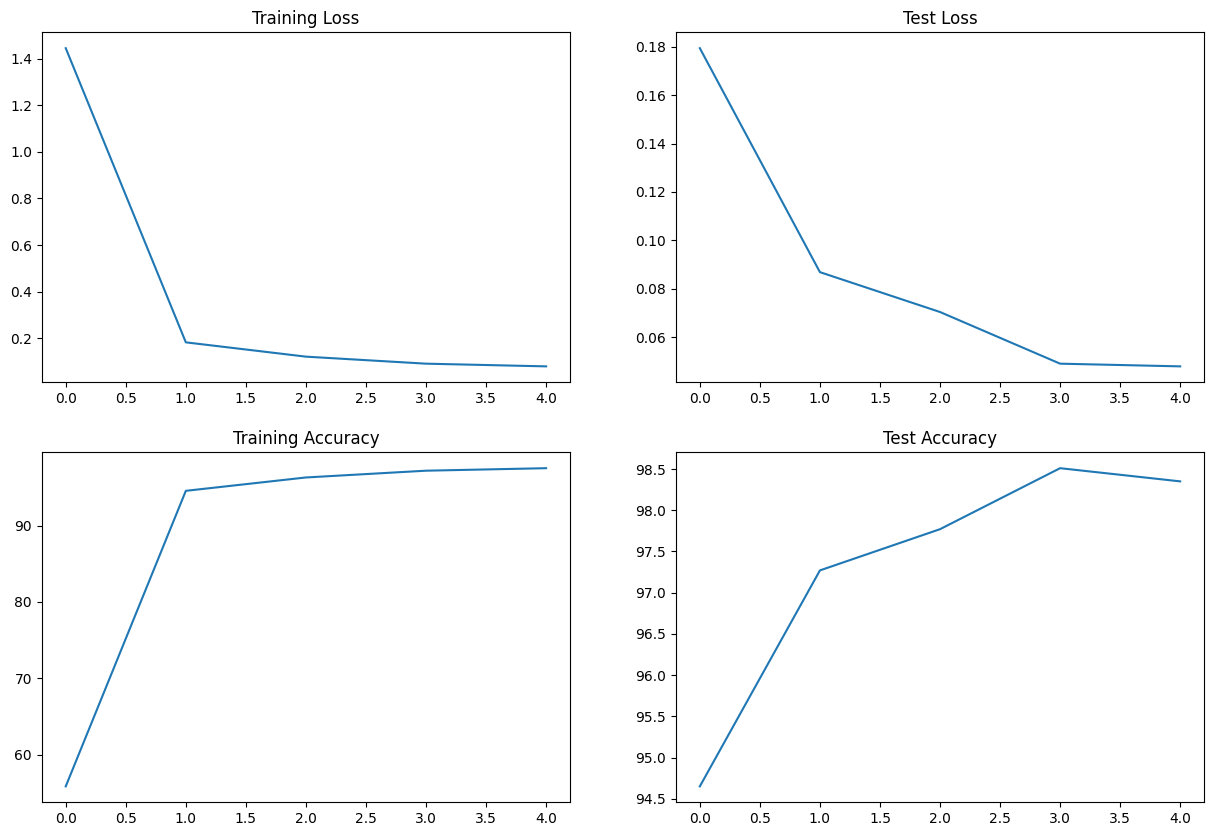

In [17]:
plot_performance(train_losses, train_acc, test_losses, test_acc)